[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


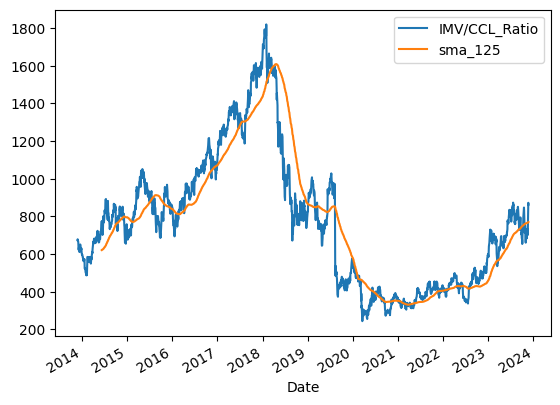

Mean: 768.6200085201519
Median: 756.8203662242671
Std Dev: 351.6874857983802


,IMV/CCL_Ratio,sma_125
Date,,
2023-11-15,716.555352,766.739131
2023-11-16,701.092668,766.784117
2023-11-17,724.548040,767.008485
2023-11-21,872.535513,768.455059
2023-11-22,862.675772,769.783361


In [ ]:
from numpy.core.fromnumeric import mean
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Download the Argentina Merval index data for daily closing prices in the last 10 years
merval = yf.Ticker('^MERV')
merval_data = merval.history(period='10y', interval='1d')['Close']

# Get the Argentina Merval index ticker
merval = yf.Ticker('^MERV')

# Define your stock symbols and conversion factors
acciones = [
    ('GGAL', 'GGAL.BA', 10),
    ('YPF', 'YPFD.BA', 1),
    ('PAM', 'PAMP.BA', 25),
    ('MELI', 'MELI.BA', 60),
]

# Download data for ADRs, local stocks, and CCL rate
adrs = pd.DataFrame()
locales = pd.DataFrame()

for accion in acciones:
    adrs[accion[0]] = yf.download(accion[0], period='10y', interval='1d')['Adj Close']
    locales[accion[1]] = yf.download(accion[1], period='10y', interval='1d')['Adj Close']

# Calculate CCL rates based on your conversion factors
for accion in acciones:
    locales[accion[1] + '_USD'] = locales[accion[1]] * accion[2] / adrs[accion[0]]

# Ensure both DataFrames have the same timezone (if needed)
# You can set the timezone for merval_data to match locales if they are different
merval_data.index = merval_data.index.tz_localize(None)  # Remove timezone information

# Calculate the IMV to CCL ratio by dividing IMV closing prices by CCL closing prices
imv_ccl = merval_data / locales[acciones[0][1] + '_USD']  # Using the first stock as an example

merval_data_cleaned = merval_data.dropna()
imv_ccl_cleaned = imv_ccl.dropna()

# Create a DataFrame with dates in the index for merval_data and returns_imv_ccl
data_df = pd.DataFrame({
    'IMV/CCL_Ratio': imv_ccl_cleaned,
    'sma_125': imv_ccl_cleaned.rolling(window=125).mean()
})

# Remove rows for the specific date
data_df = data_df[data_df.index != '2022-07-14']


# Print or display the resulting DataFrame with dates in the index
# Plot the IMV/CCL ratio
data_df.plot()
plt.show()



# Calculate the Mean, Median, and Std Dev of IMV/CCL ratio
imv_ccl_mean = np.mean(imv_ccl_cleaned)
imv_ccl_median = np.median(imv_ccl_cleaned)
imv_ccl_std = np.std(imv_ccl_cleaned)

print("Mean:", imv_ccl_mean)
print("Median:", imv_ccl_median)
print("Std Dev:", imv_ccl_std)

data_df.tail(5)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


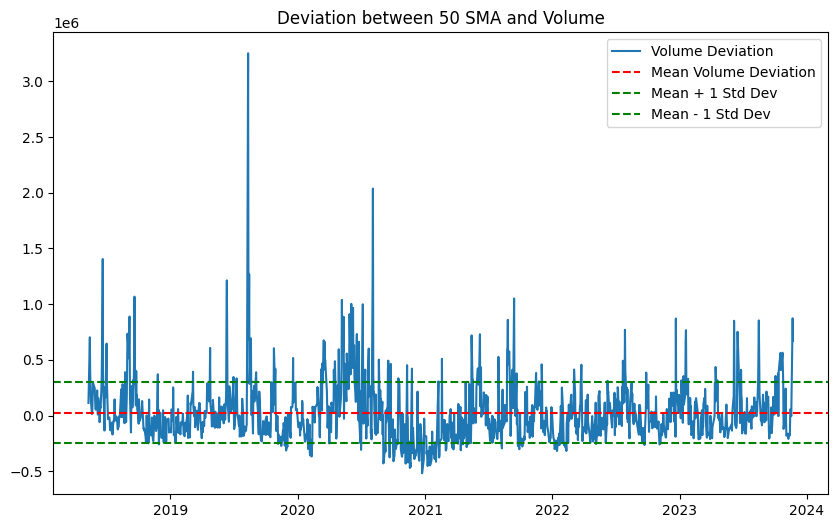

Mean Volume Deviation: 24966.582985644975
Std Volume Deviation: 272697.0226686938


In [ ]:
# Download the data for individual stocks
ggal = yf.download('GGAL.ba', period='10y', interval='1d')
loma = yf.download('LOMA.ba', period='10y', interval='1d')
eden = yf.download('EDN.ba', period='10y', interval='1d')
pamp = yf.download('PAMP.ba', period='10y', interval='1d')
ypf = yf.download('YPFD.ba', period='10y', interval='1d')

# Calculate the equal-weight portfolio by averaging the closing prices of stocks
portfolio_close = (ggal['Close'] + loma['Close'] + eden['Close'] + pamp['Close'] + ypf['Close']) / 5

# Calculate the equal-weight portfolio by averaging the volumes of stocks
portfolio_volume = (ggal['Volume'] + loma['Volume'] + eden['Volume'] + ypf['Close']) / 5

# Create a DataFrame for the portfolio's average closing price and volume
portfolio_data_df = pd.DataFrame({
    'Portfolio_Close': portfolio_close,
    'Portfolio_Volume': portfolio_volume
})

# Set the index of portfolio_data_df to the index of one of the stock DataFrames (e.g., ggal)
portfolio_data_df.index = ggal.index

# Calculate the average historical volatility for the cleaned dataset
average_portfolio_volume = portfolio_volume.mean()


# Calculate the 5, 10, and 50 SMAs for the portfolio volume
portfolio_data_df['SMA_5_Volume'] = portfolio_data_df['Portfolio_Volume'].rolling(window=5).mean()
portfolio_data_df['SMA_10_Volume'] = portfolio_data_df['Portfolio_Volume'].rolling(window=10).mean()
portfolio_data_df['SMA_50_Volume'] = portfolio_data_df['Portfolio_Volume'].rolling(window=50).mean()

# Remove rows with NaN values
portfolio_data_df.dropna(inplace=True)

# Assuming you have a 'Volume' series
volume_series = portfolio_volume

# Calculate the 125 SMA for volume
data_df['sma_50_volume'] = volume_series.rolling(window=125).mean()

# Calculate the deviation between the 50 SMA and volume
data_df['Deviation_Volume'] = volume_series - data_df['sma_50_volume']

data_df = data_df.drop(["sma_50_volume"], axis=1)

# Calculate the mean and standard deviation of the volume deviation
deviation_mean_volume = data_df['Deviation_Volume'].mean()
deviation_std_volume = data_df['Deviation_Volume'].std()

# Plot the volume deviation
plt.figure(figsize=(10, 6))
plt.plot(data_df.index, data_df['Deviation_Volume'], label='Volume Deviation')
plt.axhline(y=deviation_mean_volume, color='r', linestyle='--', label='Mean Volume Deviation')
plt.axhline(y=deviation_mean_volume + deviation_std_volume, color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y=deviation_mean_volume - deviation_std_volume, color='g', linestyle='--', label='Mean - 1 Std Dev')
plt.title('Deviation between 50 SMA and Volume')
plt.legend()
plt.show()

print("Mean Volume Deviation:", deviation_mean_volume)
print("Std Volume Deviation:", deviation_std_volume)




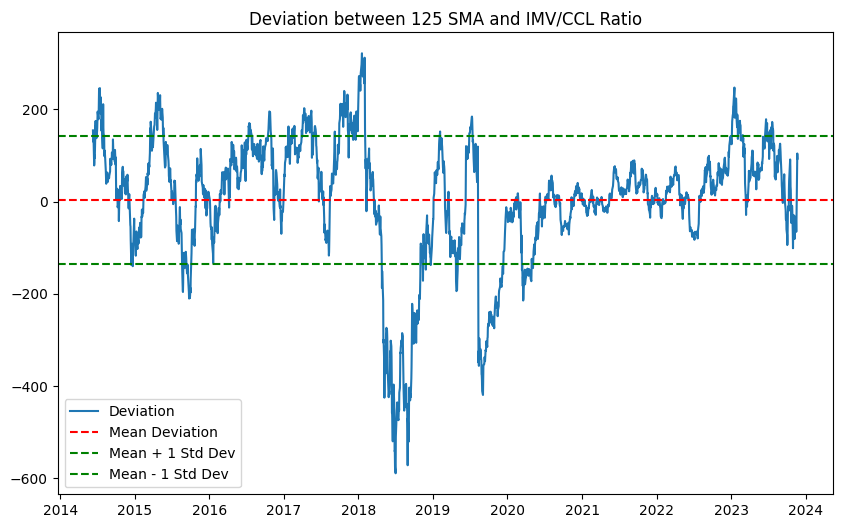

Mean Deviation: 3.565463285088008
Std Deviation: 138.26985571781466


In [ ]:
# Calculate the deviation between the 125 SMA and IMV/CCL ratio
data_df['Deviation IMV'] = data_df['IMV/CCL_Ratio'] - data_df['sma_125']

# Calculate the mean and standard deviation of the deviation
deviation_mean = data_df['Deviation IMV'].mean()
deviation_std = data_df['Deviation IMV'].std()

# Plot the deviation
plt.figure(figsize=(10, 6))
plt.plot(data_df.index, data_df['Deviation IMV'], label='Deviation')
plt.axhline(y=deviation_mean, color='r', linestyle='--', label='Mean Deviation')
plt.axhline(y=deviation_mean + deviation_std, color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y=deviation_mean - deviation_std, color='g', linestyle='--', label='Mean - 1 Std Dev')
plt.title('Deviation between 125 SMA and IMV/CCL Ratio')
plt.legend()
plt.show()

print("Mean Deviation:", deviation_mean)
print("Std Deviation:", deviation_std)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


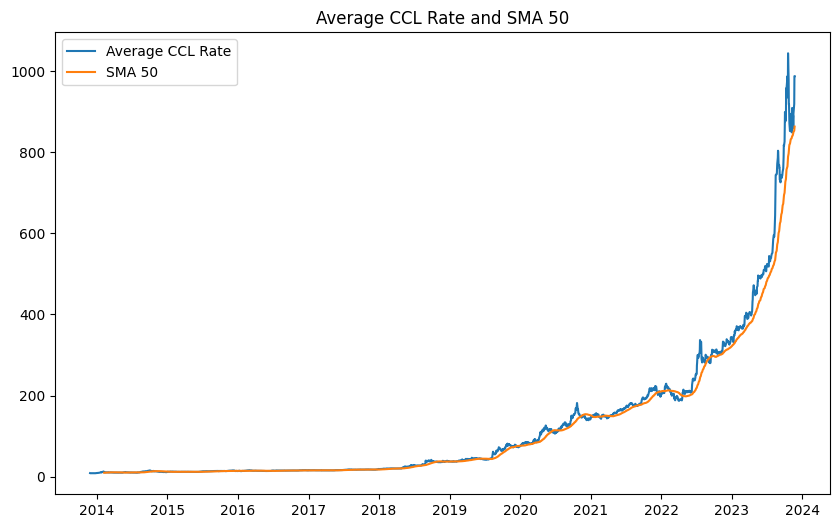

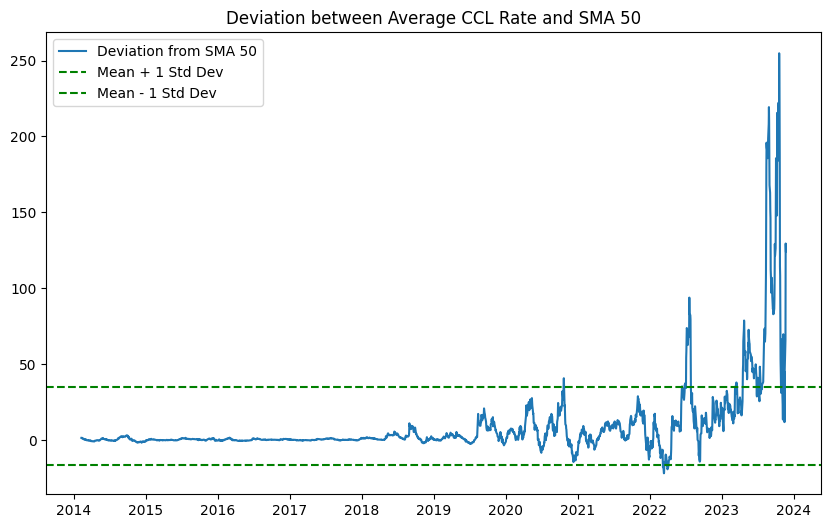

In [ ]:
# Define your stock symbols and conversion factors
acciones = [
    ('GGAL', 'GGAL.BA', 10),
    ('YPF', 'YPFD.BA', 1),
    ('PAM', 'PAMP.BA', 25),
]

# Download data for ADRs, local stocks, and CCL rate
adrs = pd.DataFrame()
locales = pd.DataFrame()

# Download data for ADRs and local stocks
for accion in acciones:
    adrs[accion[0]] = yf.download(accion[0], period='10y', interval='1d')['Adj Close']
    locales[accion[1]] = yf.download(accion[1], period='10y', interval='1d')['Adj Close']

# Calculate CCL rates based on your conversion factors
for accion in acciones:
    ccl_col_name = accion[1] + '_USD'
    locales[ccl_col_name] = locales[accion[1]] * accion[2] / adrs[accion[0]]

# Fill missing values in the DataFrame
locales_filled = locales.fillna(method='ffill').dropna()

# Calculate the average CCL rate
average_ccl = locales_filled.filter(like='_USD').mean(axis=1)

# Calculate the SMA 50 for the average CCL rate
sma_50_avg_ccl = average_ccl.rolling(window=50).mean()

# Calculate the deviation between the average CCL rate and SMA 50
deviation_avg_ccl = average_ccl - sma_50_avg_ccl

data_df['Deviation CCL'] = deviation_avg_ccl

# Plot the average CCL rate and SMA 50
plt.figure(figsize=(10, 6))
plt.plot(average_ccl.index, average_ccl, label='Average CCL Rate')
plt.plot(sma_50_avg_ccl.index, sma_50_avg_ccl, label='SMA 50')
plt.title('Average CCL Rate and SMA 50')
plt.legend()
plt.show()

# Plot the deviation with lines indicating one standard deviation above and below the mean
plt.figure(figsize=(10, 6))
plt.plot(deviation_avg_ccl.index, deviation_avg_ccl, label='Deviation from SMA 50')
plt.axhline(y=deviation_avg_ccl.mean() + deviation_avg_ccl.std(), color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y=deviation_avg_ccl.mean() - deviation_avg_ccl.std(), color='g', linestyle='--', label='Mean - 1 Std Dev')
plt.title('Deviation between Average CCL Rate and SMA 50')
plt.legend()
plt.show()


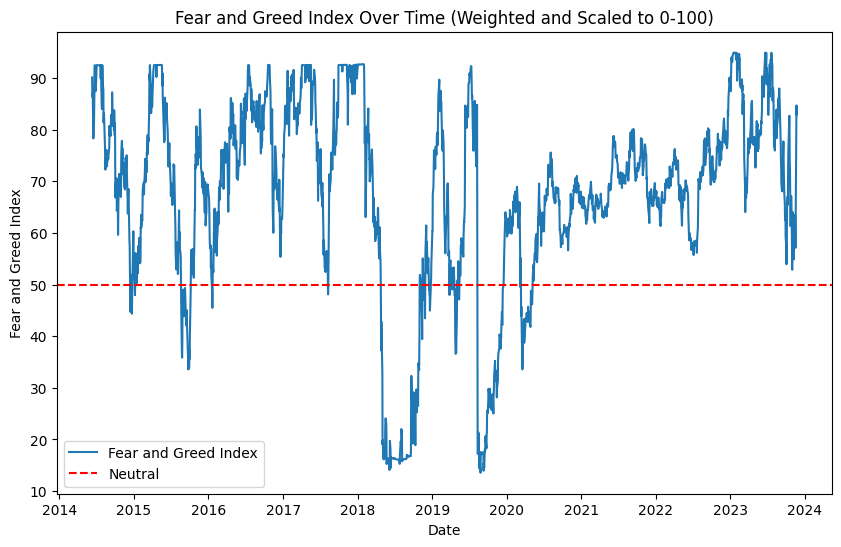

In [ ]:
# Apply scoring system and scale to 0-100 range for IMV and CCL
data_df['Score_IMV'] = ((np.clip(data_df['Deviation IMV'], -350, 170) + 350) / 5.2).clip(0, 100)  # Scaling to 0-100
data_df['Score_CCL'] = ((np.clip(data_df['Deviation CCL'], -150, 25) + 150) / 1.75).clip(0, 100)  # Scaling to 0-100

# Leverage IMV score for Volume score
volume_threshold = 0.45

# Calculate Volume score leveraging IMV score
data_df['Score_Volume'] = np.where(data_df['Score_IMV'] > volume_threshold,
                                   100 * (data_df['Score_IMV'] - 400) / 570,  # Extreme Fear to Neutral
                                   100 * (data_df['Score_IMV'] + 170) / 340)  # Neutral to Extreme Greed

# Calculate overall Fear and Greed Index with equal weights
weight_IMV = 2.4/3
weight_Volume = 0.1/3
weight_CCL = 0.5/3

data_df['Fear_and_Greed_Index'] = (
    weight_IMV * data_df['Score_IMV'] +
    weight_Volume * data_df['Score_Volume'] +
    weight_CCL * data_df['Score_CCL']
)

# Plot Fear and Greed Index
plt.figure(figsize=(10, 6))
plt.plot(data_df.index, data_df['Fear_and_Greed_Index'], label='Fear and Greed Index')
plt.axhline(y=50, color='r', linestyle='--', label='Neutral')
plt.title('Fear and Greed Index Over Time (Weighted and Scaled to 0-100)')
plt.xlabel('Date')
plt.ylabel('Fear and Greed Index')
plt.legend()
plt.show()



In [ ]:
# Add logic to categorize Fear and Greed Index
data_df['Fear_and_Greed_Category'] = pd.cut(
    data_df['Fear_and_Greed_Index'],
    bins=[-np.inf, 25, 45, 55, 75, np.inf],
    labels=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
)

#data_df = data_df.drop(["IMV/CCL_Ratio", "sma_125", "Deviation IMV", "Deviation_Volume", "Deviation CCL"], axis=1)

data_df.tail(3)

,IMV/CCL_Ratio,sma_125,Deviation IMV,Deviation_Volume,Deviation CCL,Score_IMV,Score_CCL,Score_Volume,Fear_and_Greed_Index,Fear_and_Greed_Category
Date,,,,,,,,,,
2023-11-17,724.548040,767.008482,-42.460442,-5975.817003,45.228283,59.142223,100.0,-59.799610,61.987125,Greed
2023-11-21,872.535513,768.455055,104.080458,872755.564718,66.021963,87.323165,100.0,-54.855585,84.696679,Extreme Greed
2023-11-22,862.675772,769.783358,92.892414,669197.992757,129.446881,85.171618,100.0,-55.233049,82.962859,Extreme Greed
